In [65]:
from scevonet import net
import seaborn as sns
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
#! pip install ../dist/scevonet-0.0.4.tar.gz

# Read data: count matrices and cluster lists

In [35]:
gastrulation_df = pd.read_pickle('test_data_12.pkl')
neurulation_df = pd.read_pickle('test_data_20.pkl')

In [36]:
gastrulation_df.head(3)

,BICD2,SFMBT1,YME1L1,XPO1,ZZZ3,SNRPB,LIMA1,LY6G6D,SLC25A3,EIF4A3,...,SLC39A12,MECP2,USP2,CASR-9,Xetrov107019905m.g,ACR-3,WNK4,Xetrov107028764m.g,Xetrov107061280m.g,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_involuted dorsal mesoderm
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_goblet cells
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12_involuted dorsal mesoderm


# Generate the cell type models

Two arguments: count matrix and cluster list. For each cluster scEvoNet generates model and saves top important features (genes)

In [37]:
gastrulation_obj = net.Sample(
    matrix=gastrulation_df[[x for x in gastrulation_df if x != 'clusters']],
    cell_types=gastrulation_df['clusters'])

/Users/alex/opt/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
INFO:root:Model for 12_non-neural ectoderm is generated
INFO:root:Model for 12_ciliated epidermal progenitors is generated
INFO:root:Model for 12_ionocyte is generated
INFO:root:Model for 12_tail bud is generated
INFO:root:Model for 12_involuted dorsal mesoderm is generat

In [38]:
neurulation_obj = net.Sample(
    matrix=neurulation_df[[x for x in neurulation_df if x != 'clusters']],
    cell_types=neurulation_df['clusters'])

INFO:root:Model for 20_somite is generated
INFO:root:Model for 20_presomitic mesoderm is generated
INFO:root:Model for 20_blood is generated
INFO:root:Model for 20_dorsal lateral plate region is generated
INFO:root:Model for 20_placodal area is generated
INFO:root:Model for 20_epidermal progenitor is generated
INFO:root:Model for 20_notochord is generated
INFO:root:Model for 20_small secretory cells is generated
INFO:root:Model for 20_neural crest is generated
INFO:root:Model for 20_hand1+/cfb+/pax8+ is generated
INFO:root:Model for 20_phyhd1+/krt19+ is generated
INFO:root:Model for 20_ciliated epidermal progenitors is generated
INFO:root:Model for 20_neural tube is generated


# Predict cell types similarity with generated models

In [39]:
gastrulation_vs_neurulation = net.EvoManager(gastrulation_obj, neurulation_obj)

INFO:root:Running 1 out of 4
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/scevonet/net.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = list(matrix[i])
INFO:root:Running 2 out of 4
/Users/alex/opt/miniconda3/lib/python3.9/site-packages/scevonet/net.py:126: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = [float('NaN')] * matrix.shape[0]
INFO:root:Running 3 out of 4
INFO:root:Running 4 out of 4


## Get comparison df

In [40]:
comparison_df = gastrulation_vs_neurulation.generate_comparison_df()

__Get clustermap for df.T as we want to see correlations of predctions results of the multiple models__


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fc6e2e61670>


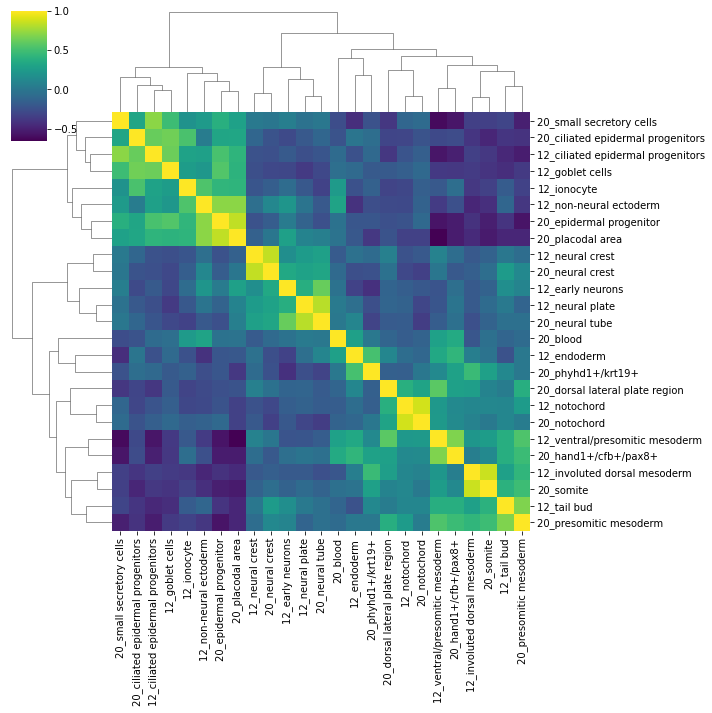

In [41]:
sns.clustermap(comparison_df.T.corr(), yticklabels=True, figsize=(10, 10),cmap='viridis')

In [75]:
subnetwork = gastrulation_vs_neurulation.generate_cell_type_network(
                              '20_neural crest',
                              '12_neural crest',
                              number_of_short_paths=50, minimal_number_of_nodes=3)

In [69]:
mpl.rcParams['figure.dpi'] = 100

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved


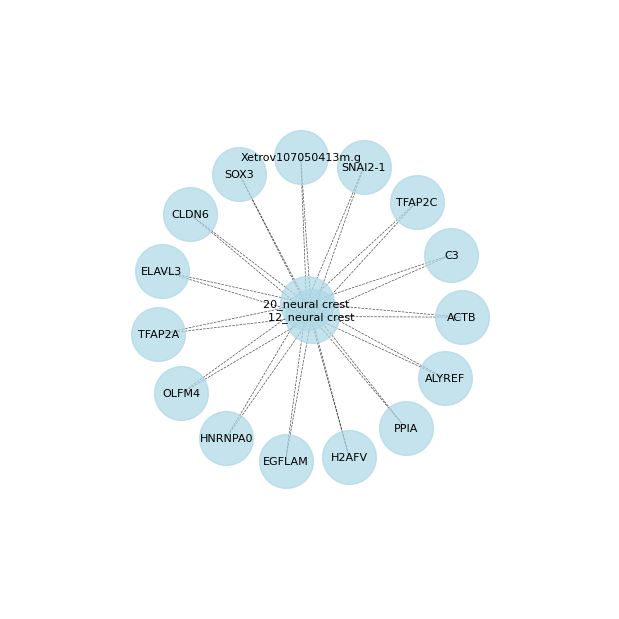

In [76]:
plt.figure(figsize=(6, 6))
net.draw_net(subnetwork, subnetwork.nodes)